<a href="https://colab.research.google.com/github/Nan2268/CREDIT_CARD_FRAUD_DETECTION/blob/main/creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns






Dataset link:https://www.kaggle.com/aniruddhachoudhury/creditcard-fraud-detection

In [ ]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/aniruddhachoudhury/creditcard-fraud-detection')



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nan12dus
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 72.7MB/s]


In [ ]:
data_df= pd.read_csv('/content/creditcard-fraud-detection/creditcard.csv')



In [ ]:
data_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data_df.shape


(284807, 31)

In [ ]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [ ]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
null_columns=pd.DataFrame({'columns':data_df.isna().sum().index,'no.Null values':data_df.isna().sum().values,'perct':data_df.isna().sum().values/data_df.shape[0]})

In [ ]:
null_columns

,columns,no.Null values,perct
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [ ]:
nfcount=0
notFraud = data_df['Class']
for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1
nfcount
per_nf=(nfcount/len(notFraud))*100
print("percentage total not fraud transaction:",per_nf)

percentage total not fraud transaction: 99.82725143693798


In [ ]:
fcount=0
fraud=data_df['Class']
for i in range(len(fraud)):
  if fraud[i]==1:
     fcount=fcount+1
fcount
per_f=(fcount/len(fraud))*100
print("percentage totalfraud transaction:",per_f)


percentage totalfraud transaction: 0.1727485630620034


In [ ]:
plot_data=pd.DataFrame()
plot_data['fraud transaction']=fraud
plot_data['genuine transaction']=notFraud
plot_data

,fraud transaction,genuine transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<ipython-input-46-e56f5d22bf95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraud transaction',y='genuine transaction', data=plot_data,palette='Blues',edgecolor='w')


<Axes: title={'center': 'Bar plot for fraud vs genuine transaction'}, xlabel='fraud transaction', ylabel='genuine transaction'>

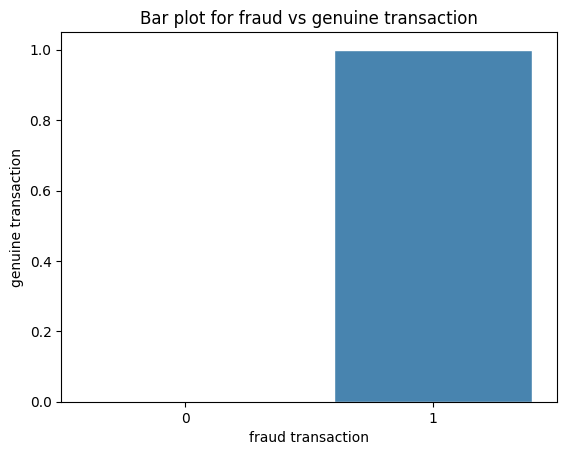

In [ ]:
plt.title("Bar plot for fraud vs genuine transaction")
sns.barplot(x='fraud transaction',y='genuine transaction', data=plot_data,palette='Blues',edgecolor='w')

Text(0.5, 1.0, 'Time vs Amount')

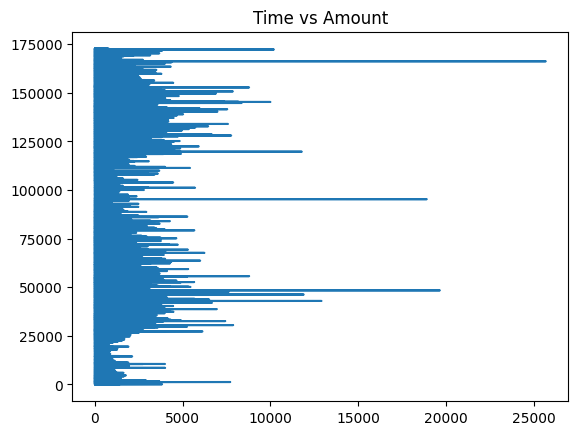

In [ ]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.title('Time vs Amount')
#sns.barplot(x=x,y=y,data=data,palette='blues',edgecolor='w')

<ipython-input-48-7a13826b30a5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Amount'],color='red');


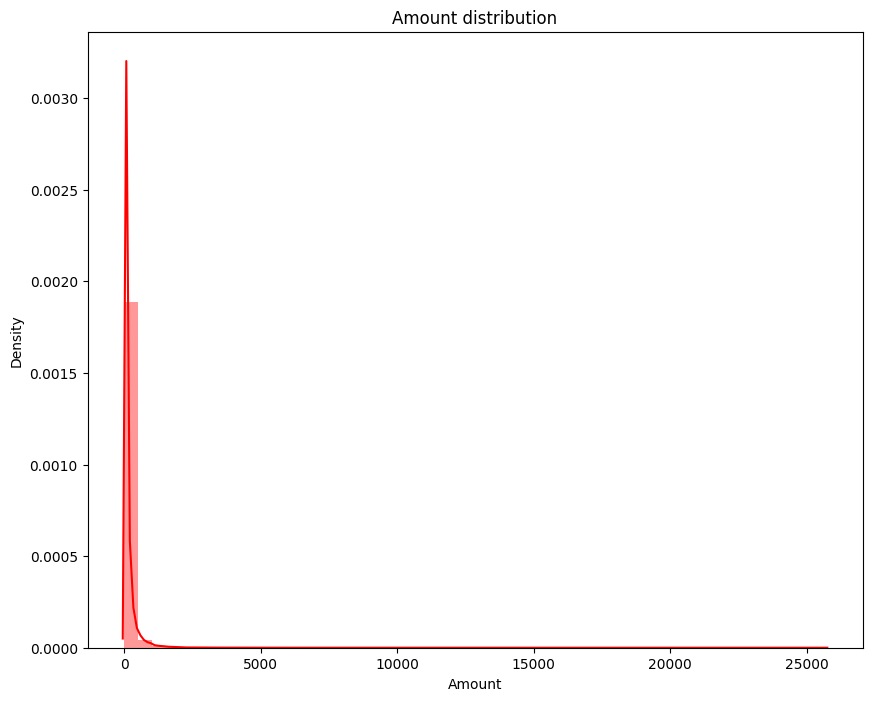

In [ ]:
plt.figure(figsize=(10,8), )
plt.title('Amount distribution')
sns.distplot(data_df['Amount'],color='red');


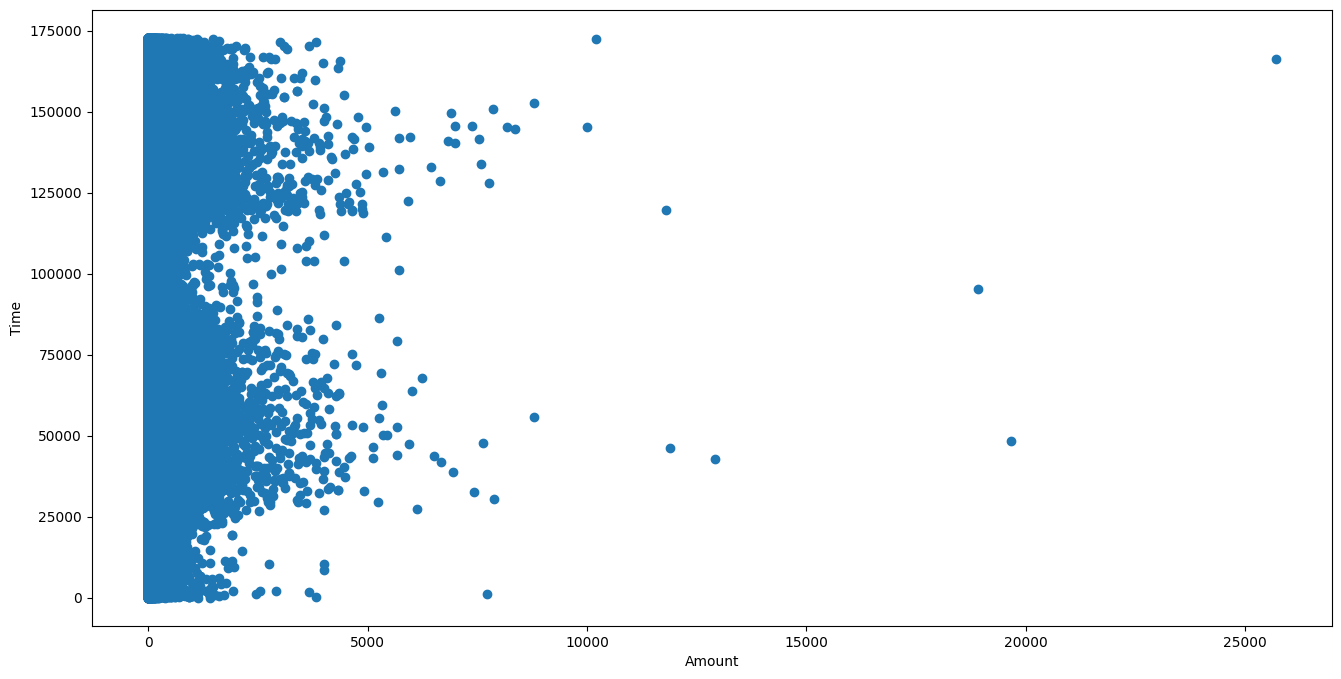

In [ ]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'],data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

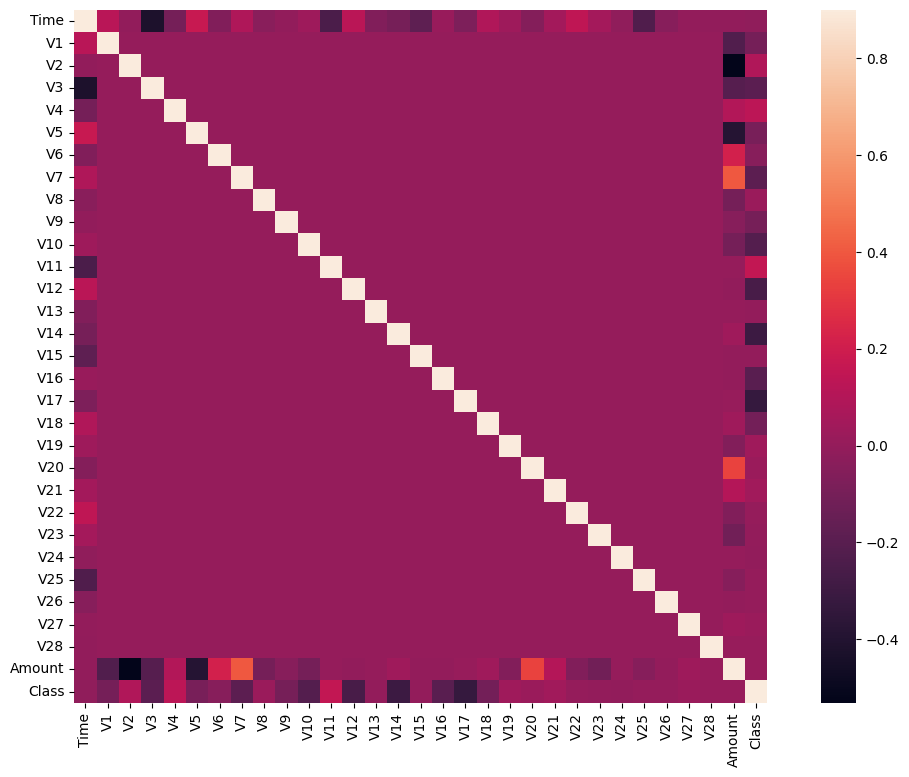

In [ ]:
correlation_metrics= data_df.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,vmax=.9,square=True)
plt.show()

In [ ]:
x=data_df.drop(['Class'],axis=1)
y=data_df['Class']
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
logisticreg=LogisticRegression()
logisticreg.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred=logisticreg.predict(xtest)
accuracy=logisticreg.score(xtest,ytest)


In [ ]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[56836    28]
 [   30    68]]


In [ ]:
print('acuracy score of model',accuracy*100,'%')

acuracy score of model 99.89817773252344 %
